In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprearing

In [163]:
df = pd.read_csv('./data/mpg.csv')

In [164]:
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [165]:
df.dropna(subset=['weight'],inplace=True)
df.dropna(subset=['mpg'],inplace=True)

In [166]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500


In [167]:
mdf = df[['mpg','cylinders','horsepower','weight']]

In [168]:
# x1, x2, x3
x = mdf[['cylinders','horsepower','weight']]
y = mdf['mpg']

In [169]:
x.head()
y.head()

0    18.0
1    15.0
2    18.0
4    17.0
5    15.0
Name: mpg, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,                                                            test_size=0.3)

In [171]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 3)
(118, 3)
(273,)
(118,)


## 다중 회귀분석

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor
lr = LinearRegression()
#lr = BayesianRidge()
#lr = TweedieRegressor()

In [173]:
# 학습 시작
lr.fit(x_train,y_train)

LinearRegression()

In [174]:
r_sqaure = lr.score(x_test,y_test)
print(r_sqaure)

0.6831563089426278


In [175]:
print(lr.coef_,lr.intercept_)

[-0.34075458 -0.05292115 -0.00501593] 45.86158130720714


In [176]:
y_hat = lr.predict(x_test)

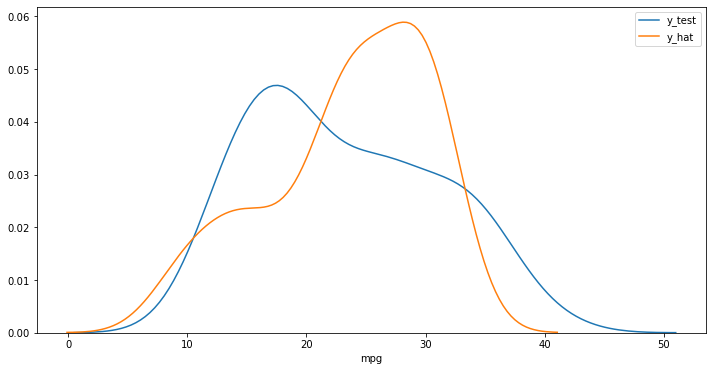

In [177]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat',ax=ax1)
plt.show()

In [178]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures

In [179]:
poly = PolynomialFeatures(degree=2)  
poly_x_train= poly.fit_transform(x_train)

In [180]:
print(poly_x_train.shape)

(273, 10)


In [181]:
lr.fit(poly_x_train,y_train)

LinearRegression()

In [182]:
poly_x_test = poly.fit_transform(x_test)

In [183]:
r_square = lr.score(poly_x_test, y_test)
print(r_square)

0.6871910593896133


In [184]:
y_test_hat = lr.predict(poly_x_test)

In [185]:
print(lr.coef_,lr.intercept_)

[ 0.00000000e+00 -5.22028662e+00 -3.91167790e-01 -2.09499171e-03
  1.24198172e-01  1.42098363e-02  6.66262773e-04  3.57047194e-04
  3.19671844e-05 -1.34981206e-06] 72.11560327185875


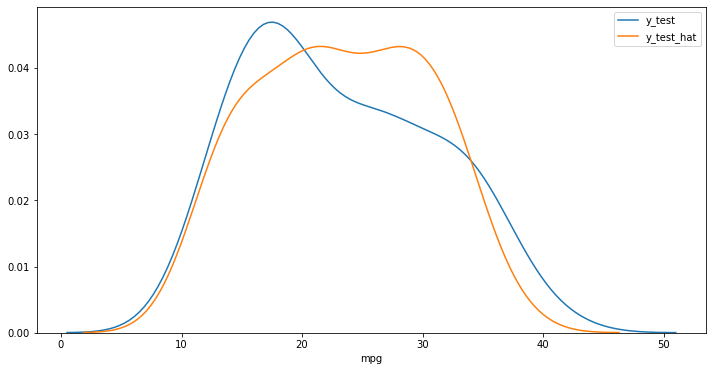

In [186]:
plt.figure(figsize=(12,6))
ax3 = sns.distplot(y_test,hist=False,label='y_test')
ax4 = sns.distplot(y_test_hat,hist=False,label='y_test_hat',ax=ax3)
plt.show()